# WeRateDogs Twitter Archive: Data Wrangling and Analysis

> #### By Reema Mohsin

## Gather Data

In [2]:
#import all libraries necessary for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import tweepy
import json

#magic function that will allow plots to be displayed in notebook
%matplotlib inline

In [3]:
#create a DataFrame of the WeRateDogs twitter archive (file on hand)
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#download file from link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [5]:
#create DataFrame for downloaded data
df_image_predictions = pd.read_csv('image_predictions.tsv',delimiter = '\t')

In [6]:
#access twitter API

####keys, secrets, and tokens have been REMOVED

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#create API object
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
#create a list from all the tweet ids in the archive
tweet_id_list = list(df_archive['tweet_id'])

#initiate a counter to track runtime
#count = 0
with open('tweet_json.txt','w') as file:
    for tweet_id in tweet_id_list:
        try:
            #extract tweet using api
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            #write tweet to file
            json.dump(tweet._json,file)
            #write newline to file
            file.write('\n')
            #count=count+1
            #print(count)
        except Exception as e:
            #capture tweets that have been deleted
            print(e)

[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 539
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{

In [6]:
#extract tweet id, retweet count, and favorite count from each json line by line
tweets = []
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = int(tweet['retweet_count'])
        favorite_count = int(tweet['favorite_count'])
        tweets.append({'tweet_id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': favorite_count})

In [7]:
#create DataFrame of tweet information
df_tweets = pd.DataFrame(tweets, columns = ['tweet_id','retweet_count','favorite_count'])
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7923,37088
1,892177421306343426,5886,31907
2,891815181378084864,3886,24025
3,891689557279858688,8078,40414
4,891327558926688256,8755,38629


## Assess Data

In [27]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [90]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [80]:
#checks unique source values and counts
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
#returns numbers of names with all lowercase letters
df_archive.name.str.islower().sum()

109

In [26]:
#returns lowercase names and their value counts
df_archive[df_archive['name'].str.islower()==True]['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
actually         2
not              2
getting          2
mad              2
his              1
unacceptable     1
infuriating      1
this             1
incredibly       1
by               1
space            1
old              1
my               1
such             1
life             1
light            1
officially       1
all              1
Name: name, dtype: int64

In [81]:
#finds rows with decimal values
df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [82]:
#returns labelling of tweets with doggo in text
df_archive[df_archive.text.str.contains("doggo")]['doggo'].value_counts()

doggo    88
None     10
Name: doggo, dtype: int64

In [78]:
#checks to see how many tweets are labelled doggo
df_archive[df_archive['doggo']=='doggo'].shape[0]

97

In [83]:
#returns labelling of tweets with floofer in text
df_archive[df_archive.text.str.contains("floofer")]['floofer'].value_counts()

floofer    4
Name: floofer, dtype: int64

In [88]:
#checks to see how many tweets are labelled floofer
df_archive[df_archive['floofer']=='floofer'].shape[0]

10

In [84]:
#returns labelling of tweets with pupper in text
df_archive[df_archive.text.str.contains("pupper")]['pupper'].value_counts()

pupper    248
None       24
Name: pupper, dtype: int64

In [86]:
#checks to see how many tweets are labelled pupper
df_archive[df_archive['pupper']=='pupper'].shape[0]

257

In [85]:
#returns labelling of tweets with puppo in text
df_archive[df_archive.text.str.contains("puppo")]['puppo'].value_counts()

puppo    29
None      8
Name: puppo, dtype: int64

In [87]:
#checks to see how many tweets are labelled puppo
df_archive[df_archive['puppo']=='puppo'].shape[0]

30

In [38]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality

* 181 retweets are included
* *tweet_id* and *rating_numerator* are int objects, *timestamp*, *retweeted_status_timestamp*, and *source* are string objects
* *source* values contain reference to link
* 109 values in the *name* column are invalid names
* 6 rows are missing full decimal value of *rating_numerator* 
* archive contains tweets that have now been deleted
* rows not correctly labelled *doggo*, *floofer*, *pupper*, or *puppo*
* *in_reply_to_status_id* and *in_reply_to_user_id* are unneeded values


### Tidiness

* *doggo*, *floofer*, *pupper*, and *puppo*, in 4 different columns
* same observational unit represented on 3 different DataFrames

## Clean Data

###### Define
`Merge` all three DataFrames on *tweet_id* to create a master table. This will also remove deleted tweets from the table.
###### Code

In [164]:
df = df_archive.merge(df_tweets, on='tweet_id')
df = df.merge(df_image_predictions, how='left', on='tweet_id')
#create copy of dataset
df_master = df.copy()

###### Test

In [146]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2331
Data columns (total 30 columns):
tweet_id                      2332 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2332 non-null object
source                        2332 non-null object
text                          2332 non-null object
retweeted_status_id           164 non-null float64
retweeted_status_user_id      164 non-null float64
retweeted_status_timestamp    164 non-null object
expanded_urls                 2273 non-null object
rating_numerator              2332 non-null int64
rating_denominator            2332 non-null int64
name                          2332 non-null object
doggo                         2332 non-null object
floofer                       2332 non-null object
pupper                        2332 non-null object
puppo                         2332 non-null object
retweet_count                 23

Before fixing the second tidiness issue, I will first address the quality issue related to *doggo*, *floofer*, *pupper*, and *puppo* mislabelling.

###### Define

For each stage, create a mask using `str.contains`. Then use `loc` to set the values of those rows with the proper stage name. Then invert the mask with `~` and use `loc` to the set the values of those rows with 'None'. Repeat for all stages.

###### Code

In [165]:
doggo_mask = df_master.text.str.contains("doggo")
df_master.loc[doggo_mask,'doggo'] = 'doggo'
not_doggo_mask = ~df_master.text.str.contains("doggo")
df_master.loc[not_doggo_mask,'doggo'] = 'None'

floofer_mask = df_master.text.str.contains("floofer")
df_master.loc[floofer_mask,'floofer'] = 'floofer'
not_floofer_mask = ~df_master.text.str.contains("floofer")
df_master.loc[not_floofer_mask,'floofer'] = 'None'

pupper_mask = df_master.text.str.contains("pupper")
df_master.loc[pupper_mask,'pupper'] = 'pupper'
not_pupper_mask = ~df_master.text.str.contains("pupper")
df_master.loc[not_pupper_mask,'pupper'] = 'None'

puppo_mask = df_master.text.str.contains("puppo")
df_master.loc[puppo_mask,'puppo'] = 'puppo'
not_puppo_mask = ~df_master.text.str.contains("puppo")
df_master.loc[not_puppo_mask,'puppo'] = 'None'

###### Test

In [166]:
#checks if the number of rows containing the stage name in text equals the number of rows labelled with that stage name
(df_master[df_master.text.str.contains("doggo")]['doggo'].value_counts()[0] == df_master.doggo.value_counts()[1],
df_master[df_master.text.str.contains("floofer")]['floofer'].value_counts()[0] == df_master.floofer.value_counts()[1],
df_master[df_master.text.str.contains("pupper")]['pupper'].value_counts()[0] == df_master.pupper.value_counts()[1],
df_master[df_master.text.str.contains("puppo")]['puppo'].value_counts()[0] == df_master.puppo.value_counts()[1])

(True, True, True, True)

###### Define
Create a new DataFrame containing only *tweet_id*, *doggo*, *floofer*, *pupper*, *puppo*. `Melt` stage columns. Then drop any rows that contain *'None'*. Next, combine the rows of tweets with multiple dog stages using a `lambda` function and `groupby`. Because this will return a *Series* object, use `to_frame()` to transform into a DataFrame and `merge` it with the master DataFrame of tweets. Rename new column and drop original stage columns.

###### Code

In [167]:
#new DataFrame with just stages
df_dogstage = df_master[['tweet_id','doggo','floofer','pupper','puppo']]
#melt stages
df_dogstage = pd.melt(df_dogstage, id_vars='tweet_id')

In [168]:
#drop rows with no stage value
df_dogstage = df_dogstage[df_dogstage.value != 'None']
#combine rows of tweets with multiple stage values
df_dogstage = df_dogstage.groupby('tweet_id')['value'].apply(lambda x: "%s" % ', '.join(x))
#from Series to DataFrame
df_dogstage = df_dogstage.to_frame()

In [169]:
#add newly cleaned column to df
df_master = df_master.merge(df_dogstage,how='left',on='tweet_id')
df_master = df_master.rename(columns={'value':'stage'})
df_master = df_master.drop(['doggo','floofer','pupper','puppo'], axis = 1)

###### Test

In [170]:
#there should be no 'None'
df_master.stage.value_counts()

pupper           261
doggo             83
puppo             34
doggo, pupper     10
floofer            4
doggo, puppo       2
Name: stage, dtype: int64

In [153]:
#checks that columns are gone
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2331
Data columns (total 27 columns):
tweet_id                      2332 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2332 non-null object
source                        2332 non-null object
text                          2332 non-null object
retweeted_status_id           164 non-null float64
retweeted_status_user_id      164 non-null float64
retweeted_status_timestamp    164 non-null object
expanded_urls                 2273 non-null object
rating_numerator              2332 non-null int64
rating_denominator            2332 non-null int64
name                          2332 non-null object
retweet_count                 2332 non-null int64
favorite_count                2332 non-null int64
jpg_url                       2061 non-null object
img_num                       2061 non-null float64
p1                            206

###### Define
Remove *in_reply_to_status_id* and *in_reply_to_user_id* columns using `drop`.

###### Code

In [171]:
#dropping unneeded columns
df_master = df_master.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id'], axis=1)

###### Test

In [172]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2331
Data columns (total 25 columns):
tweet_id                      2332 non-null int64
timestamp                     2332 non-null object
source                        2332 non-null object
text                          2332 non-null object
retweeted_status_id           164 non-null float64
retweeted_status_user_id      164 non-null float64
retweeted_status_timestamp    164 non-null object
expanded_urls                 2273 non-null object
rating_numerator              2332 non-null int64
rating_denominator            2332 non-null int64
name                          2332 non-null object
retweet_count                 2332 non-null int64
favorite_count                2332 non-null int64
jpg_url                       2061 non-null object
img_num                       2061 non-null float64
p1                            2061 non-null object
p1_conf                       2061 non-null float64
p1_dog                        

###### Define
Remove rows where *retweeted_status_id* is *null*. Then use `drop` to remove the columns associated with retweets.

###### Code

In [173]:
df_master = df_master[df_master['retweeted_status_id'].isnull()]
df_master = df_master.drop(columns = ['retweeted_status_id','retweeted_status_user_id',
                                      'retweeted_status_timestamp'], axis=0)

###### Test

In [157]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2331
Data columns (total 22 columns):
tweet_id              2168 non-null int64
timestamp             2168 non-null object
source                2168 non-null object
text                  2168 non-null object
expanded_urls         2110 non-null object
rating_numerator      2168 non-null int64
rating_denominator    2168 non-null int64
name                  2168 non-null object
retweet_count         2168 non-null int64
favorite_count        2168 non-null int64
jpg_url               1987 non-null object
img_num               1987 non-null float64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null object
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null object
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-nul

###### Define
Isolate source from *source* column by applying a `lambda` function that uses `str.split()`.

###### Code

In [174]:
#check structure of source
df_master.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [175]:
#split on '>' character and remove last 3 '</a' characters
df_master['source'] = df_master['source'].apply(lambda x: x.split('>')[1][:-3])

###### Test

In [160]:
df_master['source'].value_counts()

Twitter for iPhone     2036
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

###### Define
Cast *tweet_id* to a *string*, *rating_numerator* to a *float*, and *source* to a *category* using `astype`. Convert *timestamp* column to a datetime object using `to_datetime`.

###### Code

In [176]:
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])
df_master.tweet_id = df_master.tweet_id.astype('str')
df_master.rating_numerator = df_master.rating_numerator.astype('float')
df_master.source = df_master.source.astype('category')

###### Test

In [177]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2331
Data columns (total 22 columns):
tweet_id              2168 non-null object
timestamp             2168 non-null datetime64[ns]
source                2168 non-null category
text                  2168 non-null object
expanded_urls         2110 non-null object
rating_numerator      2168 non-null float64
rating_denominator    2168 non-null int64
name                  2168 non-null object
retweet_count         2168 non-null int64
favorite_count        2168 non-null int64
jpg_url               1987 non-null object
img_num               1987 non-null float64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null object
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null object
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog               

###### Define
Use `str.islower()` to find incorrect *name* values, and change those to *NaN* using `loc`.

###### Code

In [178]:
name_mask = df_master['name'].str.islower()
df_master.loc[name_mask,'name'] = np.nan

###### Test

In [184]:
df_master[df_master.name.str.islower() == True].name.count()

0

###### Define
Fix *rating_numerator* to include decimal values using `str.extract`.

###### Code

In [197]:
df_master['rating_numerator'] = df_master.text.str.extract(r"(\d+\.\d*)", expand=True)

###### Test

In [198]:
df_master[df_master.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
44,This is Bella. She hopes her smile made you sm...,13.5
677,"This is Logan, the Chow who lived. He solemnly...",9.75
744,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1666,I've been told there's a slight possibility he...,9.5
1689,Here we have uncovered an entire battalion of ...,11.26


## Store Data

Save the fully cleaned table in a csv file.

In [199]:
df_master.to_csv('twitter_archive_master.csv')

## Analyze Data

In [206]:
#returns top 10 objects and non-dog animals that were predicted for p1 of the image predictions
df_master.query('p1_dog == False').p1.value_counts().head(10)

seat_belt      21
teddy          18
web_site       15
tennis_ball     9
dingo           9
hamster         7
doormat         7
Siamese_cat     7
bath_towel      7
swing           7
Name: p1, dtype: int64

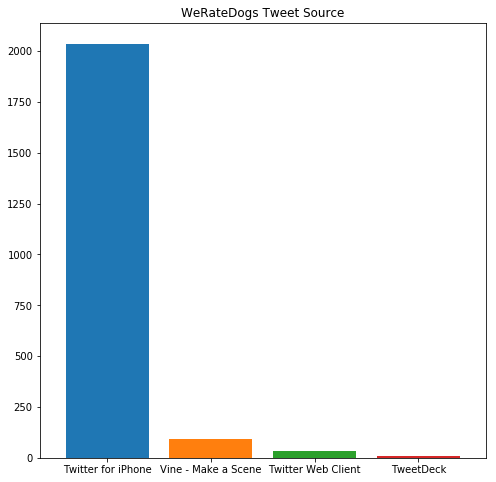

In [202]:
fig = df_master.source.value_counts().plot.bar(figsize=(8,8), rot=0, width=0.8, title = 'WeRateDogs Tweet Source')
fig.get_figure().savefig('WeRateDogs-bar-chart.png')

As illustrated by the bar chart, an Iphone was the most used source for this account when creating tweets. The breakdown of each source is below.

In [203]:
df_master.source.value_counts()

Twitter for iPhone     2036
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

In [204]:
df_master.timestamp.max()-df_master.timestamp.min()

Timedelta('624 days 17:51:48')

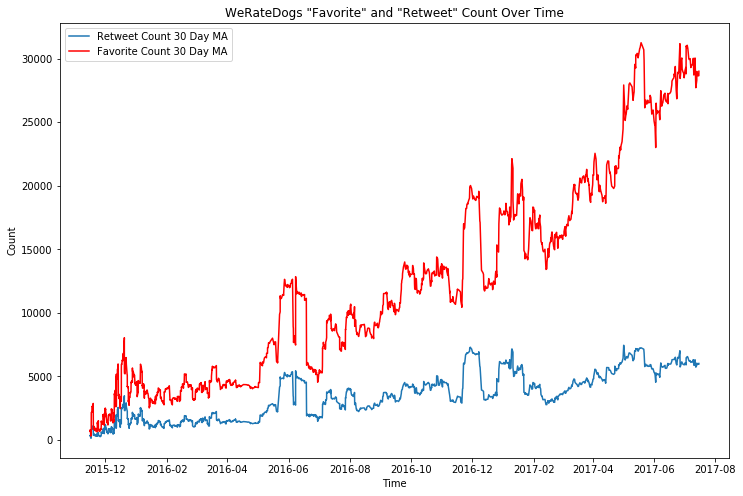

In [205]:
rolling_mean_rt = df_master.retweet_count.rolling(window=30).mean()
rolling_mean_fav = df_master.favorite_count.rolling(window=30).mean()
plt.figure(figsize=(12,8));
plt.plot(df_master.timestamp,rolling_mean_rt);
plt.plot(df_master.timestamp,rolling_mean_fav,color='red');
plt.xlabel('Time');
plt.ylabel('Count');
plt.title('WeRateDogs "Favorite" and "Retweet" Count Over Time');
plt.legend(['Retweet Count 30 Day MA','Favorite Count 30 Day MA']);
plt.savefig('WeRateDogs-line-graph.png')

The resulting plot shows the trend of the account’s retweets and favorites over the 2015 to 2017 timeframe, which appears to be increasing over time, with favorites consistently outnumbering retweets. This trend aligns with the intuition that, over this 2-year span, the account gained more popularity and therefore was seen by more Twitter users and received more engagement. This increased engagement more notably pertains to favorites.